In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing 
#import lightgbm as lgb
import xgboost as xgb
import gc
%matplotlib inline


In [73]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')
sub = pd.read_excel('Sample_Submission.xlsx')

In [74]:
train.head(10)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62
5,ChiRunning: A Revolutionary Approach to Effort...,Danny Dreyer,"Paperback,– 5 May 2009",4.5 out of 5 stars,8 customer reviews,The revised edition of the bestselling ChiRunn...,Healthy Living & Wellness (Books),Sports,900.00
6,Death on the Nile (Poirot),Agatha Christie,"Paperback,– 5 Oct 2017",4.4 out of 5 stars,72 customer reviews,Agatha Christie’s most exotic murder mystery\n...,"Crime, Thriller & Mystery (Books)","Crime, Thriller & Mystery",224.00
7,Yoga Your Home Practice Companion: A Complete ...,Sivananda Yoga Vedanta Centre,"Hardcover,– Import, 1 Mar 2018",4.7 out of 5 stars,16 customer reviews,"Achieve a healthy body, mental alertness, and ...",Sports Training & Coaching (Books),Sports,836.00
8,Karmayogi: A Biography of E. Sreedharan,M S Ashokan,"Paperback,– 15 Dec 2015",4.2 out of 5 stars,111 customer reviews,Karmayogi is the dramatic and inspiring story ...,Biographies & Autobiographies (Books),"Biographies, Diaries & True Accounts",130.00
9,"The Iron King (The Accursed Kings, Book 1)",Maurice Druon,"Paperback,– 26 Mar 2013",4.0 out of 5 stars,1 customer review,‘This is the original game of thrones’ George ...,Action & Adventure (Books),Action & Adventure,695.00


In [75]:
for df in [train,test]:
    df['Ratings_int'] = df['Ratings'].map(lambda x:x.split(' ')[0])

In [76]:
for df in [train,test]:
    df['Ratings_int'] = df['Ratings_int'].map(lambda x:x.split(','))
    df['Ratings_int'] = df['Ratings_int'].map(lambda x:''.join(x))
    df['Ratings_int'] = df['Ratings_int'].astype(int)
  

In [77]:
for df in [train,test]:
    df['Released_year'] = df['Edition'].map(lambda x:x.split(' ')[-1])

In [78]:
train['Released_year'].unique()

array(['2016', '2012', '1982', '2017', '2006', '2009', '2018', '2015',
       '2013', '1999', '2002', '2011', '1991', '2014', '1989', '2000',
       '2005', '2019', '2008', '2004', '2010', '2007', '2001', '1969',
       '1993', '1992', '2003', '1996', 'Import', '1997', '1995', 'NTSC',
       '1987', '1986', '1990', '1988', '1981', '1976', '1994', '1998',
       '1977', '1974', '1983', '1971', '1985', '1978', 'Facsimile', 'set',
       'Edition', '1964', '1984', '1980', 'Unabridged', '1979', 'Print',
       '1960', '1970', '1975', '1905', '1900', 'Audiobook', '1961',
       '1925', '1973'], dtype=object)

In [79]:
train['Released_year'].unique()

array(['2016', '2012', '1982', '2017', '2006', '2009', '2018', '2015',
       '2013', '1999', '2002', '2011', '1991', '2014', '1989', '2000',
       '2005', '2019', '2008', '2004', '2010', '2007', '2001', '1969',
       '1993', '1992', '2003', '1996', 'Import', '1997', '1995', 'NTSC',
       '1987', '1986', '1990', '1988', '1981', '1976', '1994', '1998',
       '1977', '1974', '1983', '1971', '1985', '1978', 'Facsimile', 'set',
       'Edition', '1964', '1984', '1980', 'Unabridged', '1979', 'Print',
       '1960', '1970', '1975', '1905', '1900', 'Audiobook', '1961',
       '1925', '1973'], dtype=object)

In [80]:
for df in [train,test]:
    df['Edition_Type'] = df['Edition'].map(lambda x:x.split(',')[0])

In [81]:
train

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Ratings_int,Released_year,Edition_Type
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,8,2016,Paperback
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,14,2012,Paperback
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,6,1982,Paperback
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,13,2017,Paperback
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,1,2006,Hardcover
...,...,...,...,...,...,...,...,...,...,...,...,...
6232,Humans: A Brief History of How We F*cked It Al...,Tom Phillips,"Paperback,– 8 Aug 2018",5.0 out of 5 stars,2 customer reviews,'F*cking brilliant' Sarah Knight\n'Very funny'...,Anthropology (Books),Humour,322.00,2,2018,Paperback
6233,The Chemist,Stephenie Meyer,"Paperback,– 21 Nov 2016",3.3 out of 5 stars,9 customer reviews,"In this gripping page-turner, an ex-agent on t...",Contemporary Fiction (Books),"Crime, Thriller & Mystery",421.00,9,2016,Paperback
6234,The Duke And I: Number 1 in series (Bridgerton...,Julia Quinn,"Paperback,– 8 Jun 2006",3.8 out of 5 stars,3 customer reviews,'The most refreshing and radiant love story yo...,Romance (Books),Romance,399.00,3,2006,Paperback
6235,Frostfire (Kanin Chronicles),Amanda Hocking,"Paperback,– 15 Jan 2015",3.5 out of 5 stars,4 customer reviews,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure (Books),Action & Adventure,319.00,4,2015,Paperback


In [82]:
train['Released_year']=train.Released_year.str.replace('[A-z]', '0')

In [83]:
train['Released_year'].unique()

array(['2016', '2012', '1982', '2017', '2006', '2009', '2018', '2015',
       '2013', '1999', '2002', '2011', '1991', '2014', '1989', '2000',
       '2005', '2019', '2008', '2004', '2010', '2007', '2001', '1969',
       '1993', '1992', '2003', '1996', '000000', '1997', '1995', '0000',
       '1987', '1986', '1990', '1988', '1981', '1976', '1994', '1998',
       '1977', '1974', '1983', '1971', '1985', '1978', '000000000', '000',
       '0000000', '1964', '1984', '1980', '0000000000', '1979', '00000',
       '1960', '1970', '1975', '1905', '1900', '1961', '1925', '1973'],
      dtype=object)

In [84]:
train['Released_year'] = train['Released_year'].astype(int)

In [85]:
train['Released_year'].unique()

array([2016, 2012, 1982, 2017, 2006, 2009, 2018, 2015, 2013, 1999, 2002,
       2011, 1991, 2014, 1989, 2000, 2005, 2019, 2008, 2004, 2010, 2007,
       2001, 1969, 1993, 1992, 2003, 1996,    0, 1997, 1995, 1987, 1986,
       1990, 1988, 1981, 1976, 1994, 1998, 1977, 1974, 1983, 1971, 1985,
       1978, 1964, 1984, 1980, 1979, 1960, 1970, 1975, 1905, 1900, 1961,
       1925, 1973], dtype=int64)

In [86]:
test['Released_year']=test.Released_year.str.replace('[A-z]', '0')

In [87]:
test['Released_year'].unique()

array(['1986', '2018', '2011', '2016', '2013', '2019', '2012', '2017',
       '2003', '1996', '2004', '2015', '2014', '1985', '1997', '2010',
       '1991', '2005', '1994', '2009', '2008', '1995', '1990', '2007',
       '2000', '1993', '00000', '2006', '2001', '1999', '1998',
       '00000000000', '1984', '1992', '2002', '1976', '1980', '000000',
       '1989', '1987', '1979', '1981', '1942', '000', '1960', '1972',
       '1971'], dtype=object)

In [88]:
test['Released_year'] = test['Released_year'].astype(int)

In [90]:
test['Released_year'] 

0       1986
1       2018
2       2011
3       2016
4       2011
        ... 
1555    2011
1556    2013
1557    2011
1558    2009
1559    2016
Name: Released_year, Length: 1560, dtype: int32

In [91]:
for df in [train,test]:
    print(df.dtypes)

Title             object
Author            object
Edition           object
Reviews           object
Ratings           object
Synopsis          object
Genre             object
BookCategory      object
Price            float64
Ratings_int        int32
Released_year      int32
Edition_Type      object
dtype: object
Title            object
Author           object
Edition          object
Reviews          object
Ratings          object
Synopsis         object
Genre            object
BookCategory     object
Ratings_int       int32
Released_year     int32
Edition_Type     object
dtype: object


In [92]:
for df in [train,test]:
    df['Reviews'] = df['Reviews'].map(lambda x:x.split(' ')[0])

In [93]:
train

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Ratings_int,Released_year,Edition_Type
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,8,2016,Paperback
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,14,2012,Paperback
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,6,1982,Paperback
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,13,2017,Paperback
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,1,2006,Hardcover
...,...,...,...,...,...,...,...,...,...,...,...,...
6232,Humans: A Brief History of How We F*cked It Al...,Tom Phillips,"Paperback,– 8 Aug 2018",5.0,2 customer reviews,'F*cking brilliant' Sarah Knight\n'Very funny'...,Anthropology (Books),Humour,322.00,2,2018,Paperback
6233,The Chemist,Stephenie Meyer,"Paperback,– 21 Nov 2016",3.3,9 customer reviews,"In this gripping page-turner, an ex-agent on t...",Contemporary Fiction (Books),"Crime, Thriller & Mystery",421.00,9,2016,Paperback
6234,The Duke And I: Number 1 in series (Bridgerton...,Julia Quinn,"Paperback,– 8 Jun 2006",3.8,3 customer reviews,'The most refreshing and radiant love story yo...,Romance (Books),Romance,399.00,3,2006,Paperback
6235,Frostfire (Kanin Chronicles),Amanda Hocking,"Paperback,– 15 Jan 2015",3.5,4 customer reviews,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure (Books),Action & Adventure,319.00,4,2015,Paperback


In [94]:
for df in [train,test]:
    df.pop('Reviews')
    df.pop('Ratings')
    df.pop('Edition')

In [95]:
train

,Title,Author,Synopsis,Genre,BookCategory,Price,Ratings_int,Released_year,Edition_Type
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,8,2016,Paperback
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,14,2012,Paperback
2,Leviathan (Penguin Classics),Thomas Hobbes,"""During the time men live without a common Pow...",International Relations,Humour,299.00,6,1982,Paperback
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,13,2017,Paperback
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,1,2006,Hardcover
...,...,...,...,...,...,...,...,...,...
6232,Humans: A Brief History of How We F*cked It Al...,Tom Phillips,'F*cking brilliant' Sarah Knight\n'Very funny'...,Anthropology (Books),Humour,322.00,2,2018,Paperback
6233,The Chemist,Stephenie Meyer,"In this gripping page-turner, an ex-agent on t...",Contemporary Fiction (Books),"Crime, Thriller & Mystery",421.00,9,2016,Paperback
6234,The Duke And I: Number 1 in series (Bridgerton...,Julia Quinn,'The most refreshing and radiant love story yo...,Romance (Books),Romance,399.00,3,2006,Paperback
6235,Frostfire (Kanin Chronicles),Amanda Hocking,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure (Books),Action & Adventure,319.00,4,2015,Paperback


In [96]:
test

,Title,Author,Synopsis,Genre,BookCategory,Ratings_int,Released_year,Edition_Type
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery",960,1986,Mass Market Paperback
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media",1,2018,Paperback
2,Big Girl,Danielle Steel,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance,4,2011,Paperback
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media",11,2016,Paperback
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing",9,2011,Paperback
...,...,...,...,...,...,...,...,...
1555,100 Things Every Designer Needs to Know About ...,Susan Weinschenk,We design to elicit responses from people. We ...,Design,"Computing, Internet & Digital Media",4,2011,Paperback
1556,"Modern Letter Writing Course: Personal, Busine...",ARUN SAGAR,"A 30-day course to write simple, sharp and att...",Children's Reference (Books),"Biographies, Diaries & True Accounts",13,2013,Paperback
1557,The Kite Runner Graphic Novel,Khaled Hosseini,The perennial bestseller-now available as a se...,Humour (Books),Humour,5,2011,Paperback
1558,Panzer Leader (Penguin World War II Collection),Heinz Guderian,Heinz Guderian - master of the Blitzkrieg and ...,United States History,"Biographies, Diaries & True Accounts",3,2009,Paperback


In [97]:
train['Edition_Type'].unique()

array(['Paperback', 'Hardcover', 'Mass Market Paperback', 'Sheet music',
       'Flexibound', 'Plastic Comb', 'Loose Leaf', 'Tankobon Softcover',
       'Perfect Paperback', 'Board book', 'Cards', 'Spiral-bound',
       '(Kannada)', 'Product Bundle', 'Library Binding', '(German)',
       'Leather Bound', '(French)', '(Spanish)'], dtype=object)

In [98]:
train['Synopsis1'] = train['Synopsis'] + train['Genre'] + train['BookCategory']

In [99]:
test['Synopsis1'] = test['Synopsis'] + test['Genre'] + test['BookCategory']

In [100]:
train['Synopsis1'][0] 

"THE HUNTERS return in their third brilliant novel from the Sunday Times Top Ten bestselling author Chris Kuzneski, whose writing James Patterson says has 'raw power'. The team are hunting Marco Polo's hidden treasure, but who is on their tail?\nTHE HUNTERS\nIf you seek, they will find...\n\nThe travels of Marco Polo are known throughout the world.\nBut what if his story isn't complete?\nWhat if his greatest adventure has yet to be discovered?\nGuided by a journal believed to have been dictated by Polo himself,\nthe Hunters set out in search of his final legacy:\nthe mythical treasure gathered during Polo's lifetime of exploration.\nBut as every ancient clue brings them closer to the truth,\neach new step puts them in increasing danger...\nExplosive action. Killer characters. Classic Kuzneski.Action & Adventure (Books)Action & Adventure"

In [101]:
test['Synopsis1'][0] 

"A collection of entire body of work of the Sherlock Holmes Series by Arthur Conan Doyle, 'The Complete Sherlock Holmes: All 4 Novels and 56 Short Stories’ was published way back on October 1, 1986 by RHUS (Deluxe Edition). Since the complete works were published, the collection has only become more popular and has run into several editions after that. Sherlock Holmes is one of the most popular series in crime fiction.\nAll the stories and novels in this book are centered around the famous sleuth Sherlock Holmes and how he solved even the most difficult cases with his remarkable observation techniques, reasoning abilities, towering intellect and knowledge of forensic science.\nMany times, he even had to disguise himself to get to the underlying truth. Although most of his stories are narrated by his friend and biographer Dr. Watson, two had been narrated by Holmes himself while two other stories had been written in third person.\nOften referred to as an 'eccentric’ and 'Bohemian’ by hi

In [102]:
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew

C:\Users\310295272\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 560.71 and sigma = 690.06



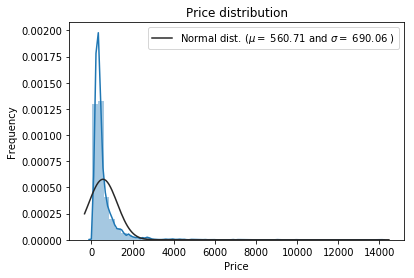

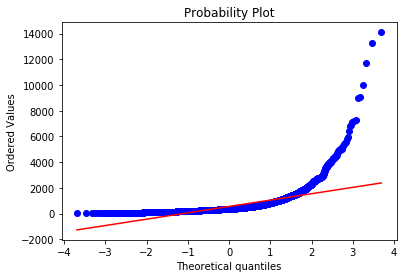

In [103]:
sns.distplot(train['Price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['Price'], plot=plt)
plt.show()


 mu = 5.99 and sigma = 0.76



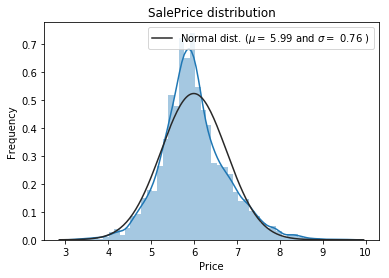

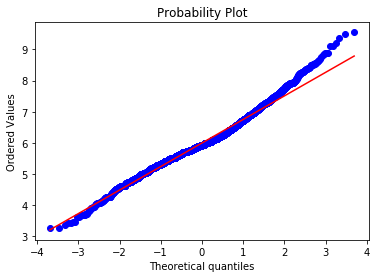

In [104]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["Price"] = np.log1p(train["Price"])

#Check the new distribution 
sns.distplot(train['Price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['Price'], plot=plt)
plt.show()

In [105]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


 

In [106]:
train['Synopsis1']=train['Synopsis1'].map(lambda s:preprocess(s))

In [107]:
test['Synopsis1']=test['Synopsis1'].map(lambda s:preprocess(s))

In [108]:
train['Synopsis1'][1]

'layered portrait troubled genius art merely thing beauty vital part living selling points original marathi book national award best book cinema available first time english book guru dutt named along masters world cinema like orson welles mizoguchi hitchcock jancso ophuls innovative cinematic form deep humanism compassion guru dutt tragedy three acts renowned film maker scholar arun khopkar sheds new light dutt genius close examination dutt three best known films pyaasa kaagaz phool sahib biwi aur ghulam nuanced eye khopkar explores historical context influenced dutt deeply melancholic style also analyzing intricacies medium acting lighting music editing rhythm dutt carefully deployed create masterpieces originally written marathi exquisite english translation paints layered portrait troubled genius art merely thing beauty vital part living cinema broadcast books biographies diaries true accounts'

In [109]:
test['Synopsis1'][1]

'enhance software deployment workflow using containers key features get running basic advanced concepts docker get acquainted concepts docker containers docker images orchestrators practical test based approach learning prominent containerization tool book descriptiondocker containers revolutionized software supply chain small big enterprises never new technology rapidly penetrated top enterprises worldwide companies embrace containers containerize traditional mission critical applications reported savings least total maintenance cost reduction time required deploy new versions applications furthermore benefitting increased security using containers opposed running applications outside containers book starts scratch introducing docker fundamentals setting environment work delve concepts docker containers docker images docker compose also cover concepts deployment orchestration networking security furthermore explain docker functionalities public clouds aws end book hands experience wor

In [35]:
train.loc[1556]

Title            My Little Pony: Spring is Here! - Ladybird Rea...
Author                                                    LADYBIRD
Synopsis         Twilight Sparkle jumped from her bed. "It's th...
Genre                         Language Learning & Teaching (Books)
BookCategory                       Language, Linguistics & Writing
Price                                                      4.79579
Ratings_int                                                      4
Released_year                                                 2017
Edition_Type                                             Paperback
Synopsis1        twilight sparkle jumped bed end winter said sp...
Name: 1556, dtype: object

In [110]:
train.dtypes

Title             object
Author            object
Synopsis          object
Genre             object
BookCategory      object
Price            float64
Ratings_int        int32
Released_year      int32
Edition_Type      object
Synopsis1         object
dtype: object

In [111]:
test.dtypes

Title            object
Author           object
Synopsis         object
Genre            object
BookCategory     object
Ratings_int       int32
Released_year     int32
Edition_Type     object
Synopsis1        object
dtype: object

In [112]:
trainbackup = train.copy()
testbackup = test.copy()

In [113]:
train.pop("Genre")
train.pop("BookCategory")
train.pop("Synopsis")
test.pop("Genre")
test.pop("BookCategory")
test.pop("Synopsis")



0       A collection of entire body of work of the She...
1       Enhance your software deployment workflow usin...
2       'Watch out, world. Here I come!'\nFor Victoria...
3       If you want to learn how to program, working w...
4       Learn and practise the verbs, prepositions and...
                              ...                        
1555    We design to elicit responses from people. We ...
1556    A 30-day course to write simple, sharp and att...
1557    The perennial bestseller-now available as a se...
1558    Heinz Guderian - master of the Blitzkrieg and ...
1559    Learn Spanish with the most convenient and eff...
Name: Synopsis, Length: 1560, dtype: object

In [114]:
train

,Title,Author,Price,Ratings_int,Released_year,Edition_Type,Synopsis1
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,5.398163,8,2016,Paperback,hunters return third brilliant novel sunday ti...
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,5.317777,14,2012,Paperback,layered portrait troubled genius art merely th...
2,Leviathan (Penguin Classics),Thomas Hobbes,5.703782,6,1982,Paperback,time men live without common power keep awe co...
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,5.198497,13,2017,Paperback,handful grain found pocket murdered businessma...
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,6.873805,1,2006,Hardcover,seven decades life thrilling world unrivalled ...
...,...,...,...,...,...,...,...
6232,Humans: A Brief History of How We F*cked It Al...,Tom Phillips,5.777652,2,2018,Paperback,cking brilliant sarah knight funny mark watson...
6233,The Chemist,Stephenie Meyer,6.045005,9,2016,Paperback,gripping page turner agent run former employer...
6234,The Duke And I: Number 1 in series (Bridgerton...,Julia Quinn,5.991465,3,2006,Paperback,refreshing radiant love story read year lisa k...
6235,Frostfire (Kanin Chronicles),Amanda Hocking,5.768321,4,2015,Paperback,frostfire amanda hocking stunning first instal...


In [115]:
test

,Title,Author,Ratings_int,Released_year,Edition_Type,Synopsis1
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,960,1986,Mass Market Paperback,collection entire body work sherlock holmes se...
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,1,2018,Paperback,enhance software deployment workflow using con...
2,Big Girl,Danielle Steel,4,2011,Paperback,watch world come victoria dawson growing happy...
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,11,2016,Paperback,want learn program working python excellent wa...
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,9,2011,Paperback,learn practise verbs prepositions idioms need ...
...,...,...,...,...,...,...
1555,100 Things Every Designer Needs to Know About ...,Susan Weinschenk,4,2011,Paperback,design elicit responses people want buy someth...
1556,"Modern Letter Writing Course: Personal, Busine...",ARUN SAGAR,13,2013,Paperback,day course write simple sharp attractive lette...
1557,The Kite Runner Graphic Novel,Khaled Hosseini,5,2011,Paperback,perennial bestseller available sensational new...
1558,Panzer Leader (Penguin World War II Collection),Heinz Guderian,3,2009,Paperback,heinz guderian master blitzkrieg father modern...


In [40]:
label_encoder = preprocessing.LabelEncoder()

In [121]:
def encode_features(train, test):
    features = ['Title', 'Author', 'Edition_Type']
    df_combined = pd.concat([train[features], test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        train[feature] = le.transform(train[feature])
        test[feature] = le.transform(test[feature])
    return train, test
    

In [122]:
train,test = encode_features(train, test)

In [123]:
train

,Title,Author,Price,Ratings_int,Released_year,Edition_Type,Synopsis1
0,5803,748,5.398163,8,2016,13,hunters return third brilliant novel sunday ti...
1,2120,370,5.317777,14,2012,13,layered portrait troubled genius art merely th...
2,2982,4045,5.703782,6,1982,13,time men live without common power keep awe co...
3,189,79,5.198497,13,2017,13,handful grain found pocket murdered businessma...
4,2853,1138,6.873805,1,2006,8,seven decades life thrilling world unrivalled ...
...,...,...,...,...,...,...,...
6232,2390,4102,5.777652,2,2018,13,cking brilliant sarah knight funny mark watson...
6233,5039,3843,6.045005,9,2016,13,gripping page turner agent run former employer...
6234,5195,2013,5.991465,3,2006,13,refreshing radiant love story read year lisa k...
6235,1910,177,5.768321,4,2015,13,frostfire amanda hocking stunning first instal...


In [124]:
test

,Title,Author,Ratings_int,Released_year,Edition_Type,Synopsis1
0,5087,3769,960,1986,12,collection entire body work sherlock holmes se...
1,2907,1303,1,2018,13,enhance software deployment workflow using con...
2,753,887,4,2011,13,watch world come victoria dawson growing happy...
3,6233,166,11,2016,13,want learn program working python excellent wa...
4,3787,3261,9,2011,13,learn practise verbs prepositions idioms need ...
...,...,...,...,...,...,...
1555,16,3935,4,2011,13,design elicit responses people want buy someth...
1556,3313,27,13,2013,13,day course write simple sharp attractive lette...
1557,5483,2159,5,2011,13,perennial bestseller available sensational new...
1558,3810,1517,3,2009,13,heinz guderian master blitzkrieg father modern...


In [125]:
y = train['Price']

In [131]:
y

0       5.398163
1       5.317777
2       5.703782
3       5.198497
4       6.873805
          ...   
6232    5.777652
6233    6.045005
6234    5.991465
6235    5.768321
6236    6.115892
Name: Price, Length: 6237, dtype: float64

In [126]:
train.pop("Price")

0       5.398163
1       5.317777
2       5.703782
3       5.198497
4       6.873805
          ...   
6232    5.777652
6233    6.045005
6234    5.991465
6235    5.768321
6236    6.115892
Name: Price, Length: 6237, dtype: float64

In [127]:
X = train

In [128]:
X

,Title,Author,Ratings_int,Released_year,Edition_Type,Synopsis1
0,5803,748,8,2016,13,hunters return third brilliant novel sunday ti...
1,2120,370,14,2012,13,layered portrait troubled genius art merely th...
2,2982,4045,6,1982,13,time men live without common power keep awe co...
3,189,79,13,2017,13,handful grain found pocket murdered businessma...
4,2853,1138,1,2006,8,seven decades life thrilling world unrivalled ...
...,...,...,...,...,...,...
6232,2390,4102,2,2018,13,cking brilliant sarah knight funny mark watson...
6233,5039,3843,9,2016,13,gripping page turner agent run former employer...
6234,5195,2013,3,2006,13,refreshing radiant love story read year lisa k...
6235,1910,177,4,2015,13,frostfire amanda hocking stunning first instal...


In [129]:
test

,Title,Author,Ratings_int,Released_year,Edition_Type,Synopsis1
0,5087,3769,960,1986,12,collection entire body work sherlock holmes se...
1,2907,1303,1,2018,13,enhance software deployment workflow using con...
2,753,887,4,2011,13,watch world come victoria dawson growing happy...
3,6233,166,11,2016,13,want learn program working python excellent wa...
4,3787,3261,9,2011,13,learn practise verbs prepositions idioms need ...
...,...,...,...,...,...,...
1555,16,3935,4,2011,13,design elicit responses people want buy someth...
1556,3313,27,13,2013,13,day course write simple sharp attractive lette...
1557,5483,2159,5,2011,13,perennial bestseller available sensational new...
1558,3810,1517,3,2009,13,heinz guderian master blitzkrieg father modern...


In [56]:
#from sklearn.feature_extraction.text import TfidfTransformer
#from sklearn_pandas import DataFrameMapper


In [ ]:
#!pip install sklearn_pandas

In [57]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [58]:
#X_train

,Title,Author,Ratings_int,Released_year,Edition_Type,Synopsis1
3400,2072,3351,49,2018,7,stereotype image nara chandrababu naidu formed...
1361,158,2005,27,1995,12,daughter maharaja cooch behar widow maharaja j...
2299,1901,2371,2,2018,12,heart deeply practical yet joyously readable b...
1526,677,669,7,2010,12,third novel bestselling conqueror series follo...
2586,792,819,7,2015,12,endorsed cambridge international examinations ...
...,...,...,...,...,...,...
3772,4570,2201,2,2018,12,award winning climate scientist michael mann p...
5191,3948,1618,32,2008,12,ready graduate boy meets girl league screenwri...
5226,1229,80,2,2008,12,seminal series legendary creator dragon ball w...
5390,2848,2122,45,2015,12,naruto ordinary young man fox called nine tail...


In [130]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import KFold

mapper = DataFrameMapper([
     ('Synopsis1', TfidfVectorizer(max_features = 500)),
     ('Title', None),
     ('Author', None),
     ('Ratings_int', None),
     ('Released_year', None),
     ('Edition_Type', None)

    ]) 

X_train = mapper.fit_transform(train)
X_test = mapper.transform(test)


In [132]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)
rfModel.fit(X = X_train,y = y)
preds = rfModel.predict(X = X_test)


In [63]:
#from sklearn.metrics import mean_squared_log_error
#np.sqrt(mean_squared_log_error( y, preds ))

0.08049975577436817

In [133]:
final_preds = np.exp(preds)

In [ ]:
orig_preds = np.exp(y)

In [136]:
np.round(final_preds)

array([332., 653., 354., ..., 361., 491., 927.])

In [ ]:
orig_preds[:40]

In [ ]:
sub

In [137]:
final_preds.shape

(1560,)

In [138]:
submission['Price'] = final_preds
submission.head()

NameError: name 'submission' is not defined

In [139]:
sub

,Price
0,119
1,123
2,108
3,118
4,132
...,...
1555,104
1556,114
1557,131
1558,106


In [141]:
submission = pd.DataFrame()


In [145]:
submission['Price'] = np.round(final_preds,0)

In [146]:
submission

,Price
0,332.0
1,653.0
2,354.0
3,768.0
4,279.0
...,...
1555,1175.0
1556,267.0
1557,361.0
1558,491.0


In [149]:
submission.to_excel('submission1.xlsx', index=False)